In [1]:
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

import torch
from torch.utils.data import TensorDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [2]:
plant=['rice','maize','chickpea','kidneybeans','pigeonpeas','mothbeans','mungbean','blackgram','lentil','pomegranate','banana','mango','grapes','watermelon','muskmelon','apple','orange','papaya','coconut','cotton','jute','coffee']
j=1
filename = 'Crop_recommendation.csv'
crop = pd.read_csv(filename)
crop.shape
crop.columns = crop.columns.str.replace(' ', '')

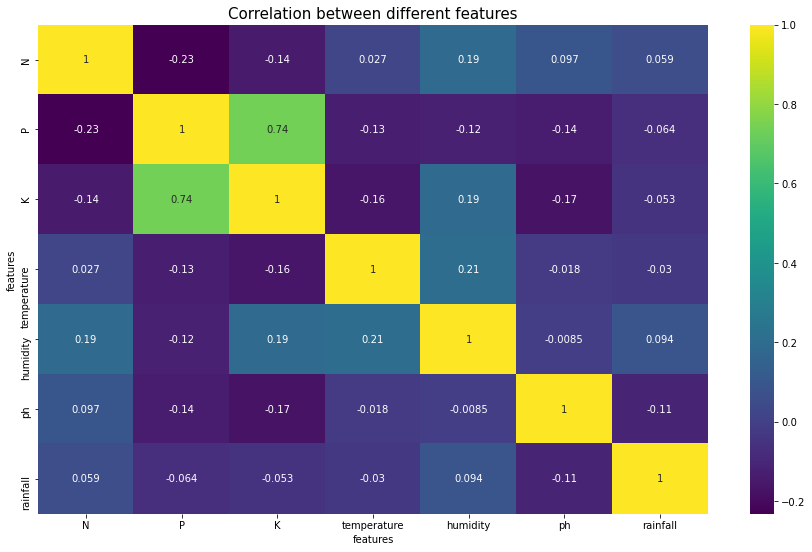

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()


In [4]:
for i in range(0,22):
    crop.loc[crop.label ==plant[i],'label'] = j
    j=j+1

In [5]:
crop= crop.astype(float)
crop = torch.tensor(crop.values)

In [6]:
name=crop[:,7]
name

tensor([ 1.,  1.,  1.,  ..., 22., 22., 22.], dtype=torch.float64)

In [7]:
crop
crops=crop[:,0:7]
crops.shape

torch.Size([2200, 7])

In [8]:
#Define Dataset
train_ds=TensorDataset(crops,name)
train_ds[0:3]

(tensor([[ 90.0000,  42.0000,  43.0000,  20.8797,  82.0027,   6.5030, 202.9355],
         [ 85.0000,  58.0000,  41.0000,  21.7705,  80.3196,   7.0381, 226.6555],
         [ 60.0000,  55.0000,  44.0000,  23.0045,  82.3208,   7.8402, 263.9642]],
        dtype=torch.float64),
 tensor([1., 1., 1.], dtype=torch.float64))

In [9]:
#Define DataLoader
batch_size=5
train_dl=DataLoader(train_ds,batch_size,shuffle=True)

In [10]:
# for xb,yb in train_dl:
#     print(xb)
#     print(yb)

In [11]:
#method to split the dataset into trainng and validation sets
def split(n,val):
    #Determine size of validation set
    n_val=int(val*n)
    #Create random permutation of 0 to n-1
    index=np.random.permutation(n)
    #Pick first n_val indices for validation set
    return index[n_val:],index[:n_val]

In [12]:
#Split the data into training and validation set
train_indices,val_indices=split(len(crop),val=0.2)

In [13]:
batch_size=100
#Training sampler and data loader
train_sampler=SubsetRandomSampler(train_indices)
train_loader=DataLoader(crop,
                       batch_size,
                       sampler=train_sampler)

#Validation sampler and data loader
val_sampler=SubsetRandomSampler(val_indices)
val_loader=DataLoader(crop,
                       batch_size,
                       sampler=val_sampler)